   # The Sparks Foundation

## Graduate Rotational Internship (GRIP) 

### DECEMBER 2022 Batch

# Candidate Name : Abdul Jaweed

# Task 1 : Prediction Using Supervised ML 

#### Objective of the Task is to train the ML Model is to prediction the percentage of the student based on the no. of studies hours.

## Simple Linear Regression Problem

In [1]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset form url
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.sample(5)

,Hours,Scores
16,2.5,30
8,8.3,81
18,6.1,67
24,7.8,86
17,1.9,24


In [6]:
df.shape

(25, 2)

## EDA

In [7]:
# remaing the columns

df.rename(columns={'Scores': 'Percentage'}, inplace=True)
df.head()

,Hours,Percentage
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hours       25 non-null     float64
 1   Percentage  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# checking the missing values

df.isnull().sum()

Hours         0
Percentage    0
dtype: int64

In [10]:
# checking the duplicated values

df.duplicated().sum()

0

In [11]:
# checking the statistical summary of the data

df.describe()

,Hours,Percentage
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
# checking the correlation of the given data

df.corr()

,Hours,Percentage
Hours,1.000000,0.976191
Percentage,0.976191,1.000000


## Data Visualization

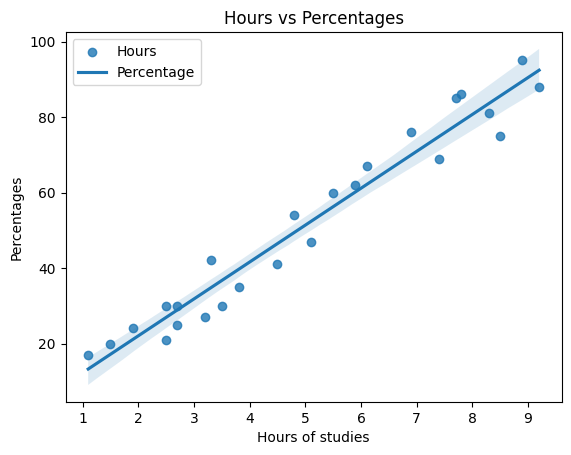

In [13]:
# checking the relation between hours and percentage via regression plot

sns.regplot(x = df['Hours'], y = df['Percentage'])
plt.title("Hours vs Percentages")
plt.xlabel("Hours of studies")
plt.ylabel("Percentages")
plt.legend(df)
plt.show()

<AxesSubplot:>

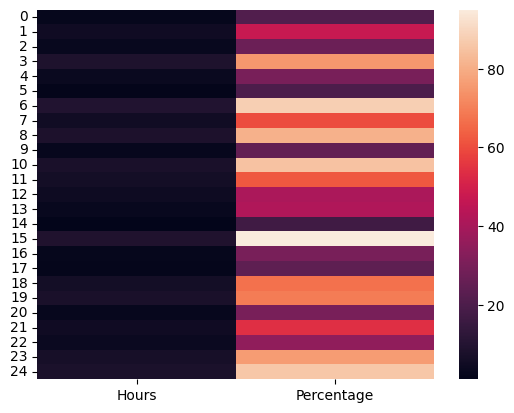

In [14]:
# checking the behaviour of the data

sns.heatmap(df)

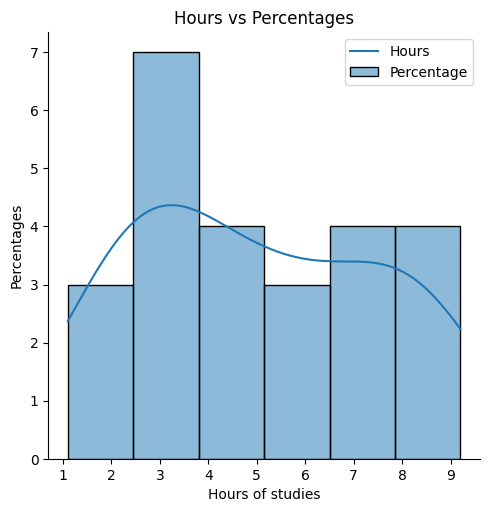

In [15]:
# checking the distribution of the Hours columns

sns.displot(df['Hours'], kde = True)
plt.title("Hours vs Percentages")
plt.xlabel("Hours of studies")
plt.ylabel("Percentages")
plt.legend(df)
plt.show()

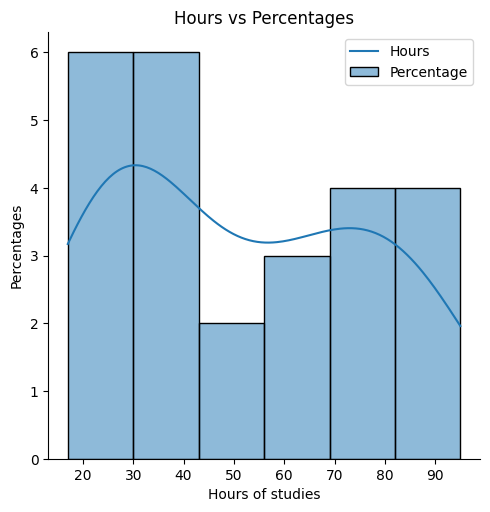

In [16]:
# checking the distribution of the percentage columns

sns.displot(df['Percentage'], kde = True)
plt.title("Hours vs Percentages")
plt.xlabel("Hours of studies")
plt.ylabel("Percentages")
plt.legend(df)
plt.show()

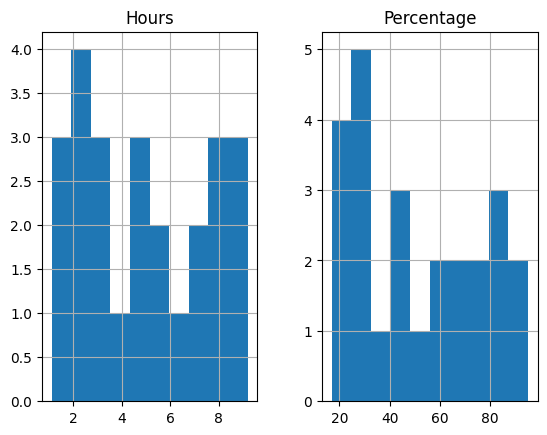

In [17]:
# summarizing the data

df.hist()
plt.show()

## Splitting data

In [18]:
# Splitting data into two variables 

X = df.drop('Percentage', axis=1) # independent variable
y = df['Percentage'] ## dependent variable

print('Shape of X : ', X.shape)
print('Shape of y : ', y.shape)

Shape of X :  (25, 1)
Shape of y :  (25,)


In [19]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [20]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Percentage, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 51)

print('Shape of X_train : ', X_train.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train :  (17, 1)
Shape of y_train :  (17,)
Shape of X_test :  (8, 1)
Shape of y_test :  (8,)


## Model Building

In [22]:
# Regression Model Building 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# training the model 

lr.fit(X_train, y_train)

LinearRegression()

In [23]:
# The coefficients

print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [9.61405732]
Intercept:  3.370382388693166


In [24]:
# accuracy of the train data

lr.score(X_train, y_train)

0.9548526458597515

In [25]:
# accuray of the test data

lr.score(X_test, y_test)

0.9361670674106156

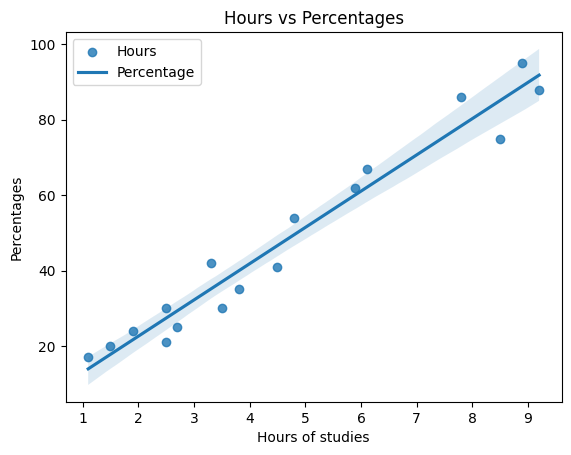

In [26]:
# checking the relation between hours and percentage after training the Regression Model via regression plot

sns.regplot(x = X_train, y = y_train)
plt.title("Hours vs Percentages")
plt.xlabel("Hours of studies")
plt.ylabel("Percentages")
plt.legend(df)
plt.show()

In [27]:
#Prediction value

y_pred = lr.predict(X_test)
y_pred

array([56.24769763, 77.39862373, 69.70737788, 83.16705812, 29.32833714,
       52.40207471, 74.51440654, 34.1353658 ])

In [28]:
# Actual value

y_test

7     60
10    85
23    76
8     81
20    30
1     47
19    69
2     27
Name: Percentage, dtype: int64

In [29]:
#Actual value vs Prediction value

prediction = pd.DataFrame({'Actual Value':y_test,'Prediction Value':y_pred})
prediction

,Actual Value,Prediction Value
7,60,56.247698
10,85,77.398624
23,76,69.707378
8,81,83.167058
20,30,29.328337
1,47,52.402075
19,69,74.514407
2,27,34.135366


## Model Evaluation

In [30]:
y_pred = lr.predict(X_test)
y_pred

array([56.24769763, 77.39862373, 69.70737788, 83.16705812, 29.32833714,
       52.40207471, 74.51440654, 34.1353658 ])

In [31]:
# actual price value

y_test

7     60
10    85
23    76
8     81
20    30
1     47
19    69
2     27
Name: Percentage, dtype: int64

In [32]:
# importing metrics from sklearm library to the accuracy of the model

from sklearn.metrics import mean_squared_error
from sklearn import metrics  
from sklearn.metrics import r2_score

In [33]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # square error
mae = metrics.mean_absolute_error(y_test, y_pred)
r2s = metrics.r2_score(y_test, y_pred)

print('Mean Square Error : ', mse)
print('Root Mean Square Error : ', rmse)
print('Mean Absolute Error : ', mae)
print('R2 score Error : ', r2s)

Mean Square Error :  28.38869937955701
Root Mean Square Error :  5.32810467047683
Mean Absolute Error :  4.817108597564745
R2 score Error :  0.9361670674106156


In [37]:
# predicting the score when student studies for 9.25 hours

lr.predict([[9.25]])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.30041257])

#### According to the Regression Model if a Student studies for 9.25 hours a day  probabily the Percentage of the score is  92.30 